In [1]:
# Cargar Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Exploración de datos

In [23]:
#Cargar archivo .csv
df = pd.read_csv('wine-clustering.csv')

#Imprimir las primeros datos
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Alcohol,14.23,13.20,13.16,14.37,13.24,14.20,14.39,14.06,14.83,13.86,14.10,14.12,13.75,14.75,14.38
Malic_Acid,1.71,1.78,2.36,1.95,2.59,1.76,1.87,2.15,1.64,1.35,2.16,1.48,1.73,1.73,1.87
Ash,2.43,2.14,2.67,2.50,2.87,2.45,2.45,2.61,2.17,2.27,2.30,2.32,2.41,2.39,2.38
Ash_Alcanity,15.60,11.20,18.60,16.80,21.00,15.20,14.60,17.60,14.00,16.00,18.00,16.80,16.00,11.40,12.00
Magnesium,127.00,100.00,101.00,113.00,118.00,112.00,96.00,121.00,97.00,98.00,105.00,95.00,89.00,91.00,102.00
Total_Phenols,2.80,2.65,2.80,3.85,2.80,3.27,2.50,2.60,2.80,2.98,2.95,2.20,2.60,3.10,3.30
Flavanoids,3.06,2.76,3.24,3.49,2.69,3.39,2.52,2.51,2.98,3.15,3.32,2.43,2.76,3.69,3.64
Nonflavanoid_Phenols,0.28,0.26,0.30,0.24,0.39,0.34,0.30,0.31,0.29,0.22,0.22,0.26,0.29,0.43,0.29
Proanthocyanins,2.29,1.28,2.81,2.18,1.82,1.97,1.98,1.25,1.98,1.85,2.38,1.57,1.81,2.81,2.96
Color_Intensity,5.64,4.38,5.68,7.80,4.32,6.75,5.25,5.05,5.20,7.22,5.75,5.00,5.60,5.40,7.50


In [3]:
# Renglones y columnas
df.shape

(178, 13)

In [4]:
#Identificación de datos faltantes por cada columna

df.isnull().sum().to_frame()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [5]:
print("No se encuentran datos nulos en nuestro ejercicio")

No se encuentran datos nulos en nuestro ejercicio


In [6]:
#Descripción de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<AxesSubplot:>

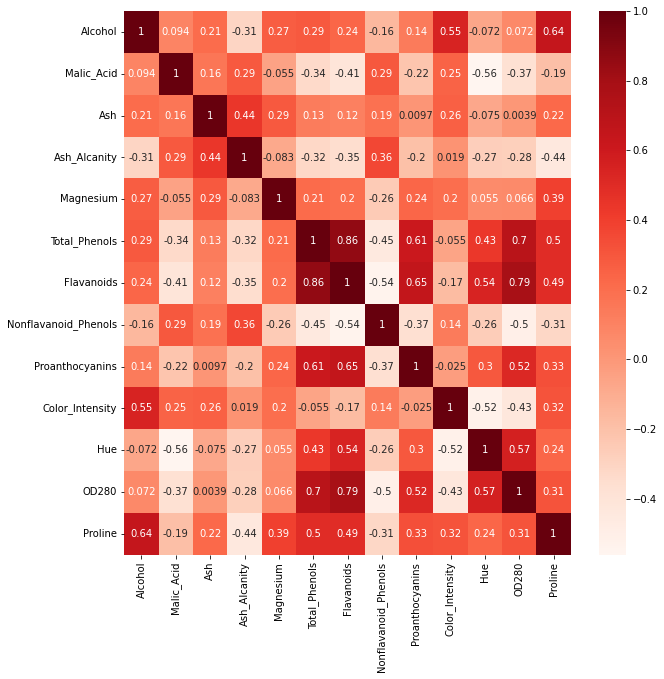

In [7]:
#Correlación de las variables 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Reds', annot=True)

Las variables que más correlación tienen entre sí son Total_Phenols vs Flavanoids.

# Selección de cantidad de clústers

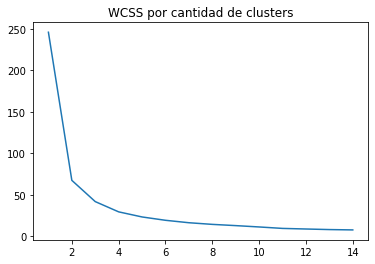

In [8]:
# Selección de variables
df_data = df[ ['Total_Phenols', 'Flavanoids'] ]

X = df_data.values

#Determinando cuantos clusters son necesarios
wcss = []
rango_clusters = range(1,15)

for k in rango_clusters:
    agrupamiento = KMeans(n_clusters=k, random_state=0)
    agrupamiento.fit( X )
    
    wcss.append(agrupamiento.inertia_)


plt.title('WCSS por cantidad de clusters')
plt.plot(rango_clusters, wcss)

De acuerdo al resultado del WCSS y como se puede apreciar en la gráfica anterior, se determina que tres clusters es la cantidad necesaria para este análisis.

# Visualización de cluster - sin pre-procesar los datos

In [9]:
# Dividir la población en los 3 clusters
agrupamiento = KMeans(n_clusters=3, random_state=0)

# Correr el algoritmo
agrupamiento.fit(X)

# Agregar el número de cluster al dataframe
df_data['cluster'] = agrupamiento.labels_

print('Centroides')
print(agrupamiento.cluster_centers_)

df_data

Centroides
[[1.64919355 0.89709677]
 [2.96548387 3.09564516]
 [2.26703704 2.10481481]]


,Total_Phenols,Flavanoids,cluster
0,2.80,3.06,1
1,2.65,2.76,1
2,2.80,3.24,1
3,3.85,3.49,1
4,2.80,2.69,1
...,...,...,...
173,1.68,0.61,0
174,1.80,0.75,0
175,1.59,0.69,0
176,1.65,0.68,0


,Total_Phenols,Flavanoids
0,1.649194,0.897097
1,2.965484,3.095645
2,2.267037,2.104815


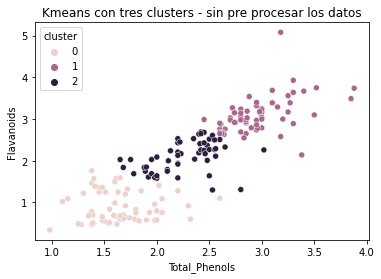

In [10]:
# Graficar los tres clusters

df_centroides = pd.DataFrame(agrupamiento.cluster_centers_, columns=['Total_Phenols', 'Flavanoids'])

plt.title('Kmeans con tres clusters - sin pre procesar los datos')
sns.scatterplot(data=df_data, x='Total_Phenols', y='Flavanoids', hue='cluster')

df_centroides

,Total_Phenols,Flavanoids
0,1.649194,0.897097
1,2.965484,3.095645
2,2.267037,2.104815


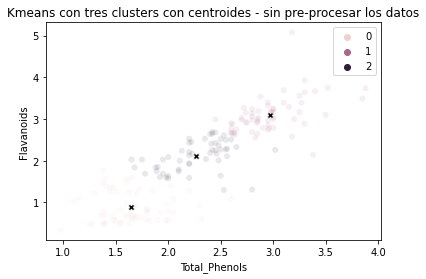

In [11]:
#Visualizando los centroides

df_centroides = pd.DataFrame(agrupamiento.cluster_centers_, columns=['Total_Phenols', 'Flavanoids'])

plt.title('Kmeans con tres clusters con centroides - sin pre-procesar los datos')
sns.scatterplot(data=df_data, x='Total_Phenols', y='Flavanoids', hue='cluster', alpha=0.1)
sns.scatterplot(data=df_centroides, x='Total_Phenols', y='Flavanoids', color='black', marker='X')

df_centroides

# Visualización de cluster - con pre-procesamiento de datos

In [27]:
# Selección de variables
agrupamiento = KMeans(n_clusters=4)
df_data_prep = df_data.copy()

X = df_data_prep.values

# Usando encoder StandarScaler
encoder = StandardScaler()
X_encoded = encoder.fit_transform( X )

# Urilizamos el algoritmo
agrupamiento.fit(X_encoded)

# Agregemos el cluster al dataframe
df_data_prep['cluster'] = agrupamiento.labels_

print('Centroides')
print(agrupamiento.cluster_centers_)

Centroides
[[-0.06599008  0.02780448  1.26536305]
 [-1.08582756 -1.15535997 -1.22341731]
 [ 0.89500009  0.89877122  0.02097287]
 [ 1.70744758  1.61209982  0.02097287]]


<AxesSubplot:title={'center':'Kmeans con tres clusters - pre-procesando los datos'}, xlabel='Total_Phenols', ylabel='Flavanoids'>

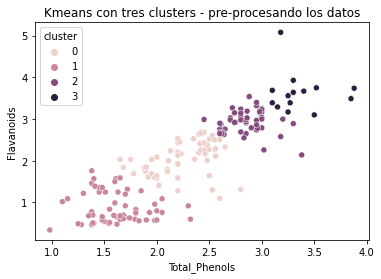

In [28]:
# Graficar los tres clusters

df_centroides_prep = pd.DataFrame(agrupamiento.cluster_centers_, columns=['Total_Phenols', 'Flavanoids', 'labels'])

plt.title('Kmeans con tres clusters - pre-procesando los datos')
sns.scatterplot(data=df_data_prep, x='Total_Phenols', y='Flavanoids', hue='cluster')


<AxesSubplot:title={'center':'Kmeans con tres clusters con centroides - pre-procesando los datos'}, xlabel='Total_Phenols', ylabel='Flavanoids'>

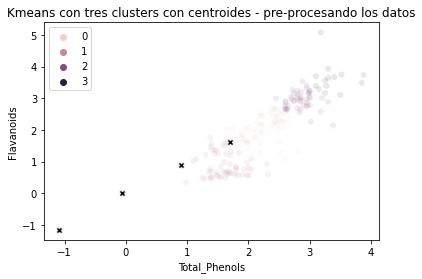

In [29]:
plt.title('Kmeans con tres clusters con centroides - pre-procesando los datos')
sns.scatterplot(data=df_data_prep, x='Total_Phenols', y='Flavanoids', hue='cluster', alpha=0.1)
sns.scatterplot(data=df_centroides_prep, x='Total_Phenols', y='Flavanoids', color='black', marker='X')

In [15]:
#Whaaaaaaaaaaaaaaaaaaaaaaaaaaat????🤔🤔🤔🤔🤔

# Conclusiones